# NN2 Projectwork DAT20

# Music Genre Classification with a CNN

### Bahareh Kavandi & Elisabeth Oitzinger

In [106]:
import os
from time import sleep
from dataclasses import replace
import keras
from keras.models import Sequential
#import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras import layers
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, 
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout)
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import load_img,img_to_array
import librosa
from pydub import AudioSegment
from pydub.playback import play


<b>Step 1:</b> Make new directories for the training, validation and testing dataset (80% training, 10% validation, 10% test)


<b>Step 2:</b> Datagenerator

In [2]:
splitfolders.ratio('Data/images_original', output="datasets", seed=1337, ratio=(.8, 0.1, 0.1)) 

train_dir = "datasets/train/"
train_datagenerator = ImageDataGenerator(rescale=1./255)
train_generator = train_datagenerator.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

val_dir = "datasets/val/"
val_datagenerator = ImageDataGenerator(rescale=1./255)
val_generator = val_datagenerator.flow_from_directory(val_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)


Copying files: 999 files [00:00, 1504.17 files/s]


Found 799 images belonging to 10 classes.
Found 99 images belonging to 10 classes.


<b>Step 3:</b> Build the model (5 Convolutional layers, Dropout layer to avoid over-fitting, Dense layer with Softmax activation)

In [3]:
def GenreModel(input_shape=(288,432,4), classes=10):
    X_input = Input(input_shape)

    X = Conv2D(8,kernel_size=(3,3),strides=(1,1))(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(16,kernel_size=(3,3),strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(32,kernel_size=(3,3),strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(64,kernel_size=(3,3),strides=(1,1))(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(128,kernel_size=(3,3),strides=(1,1))(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Flatten()(X)
    

    X = Dense(X.shape[1], activation='relu', name='fc1')(X)
    X = Dropout(0.1)(X)
    X = Dense(256, activation='relu', name='fc3')(X)
    X = Dropout(0.1)(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

    model = Model(inputs=X_input,outputs=X,name='GenreModel')
    return model

<b>Step 4:</b> Train the model

In [4]:
model = GenreModel()
opt = Adam(learning_rate=0.0005)
model.compile(opt, loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit_generator(train_generator, epochs= 250, validation_data=val_generator)

C:\Users\elio9\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/250
7/7 [==============================] - 29s 4s/step - loss: 35.5507 - accuracy: 0.1227 - val_loss: 2.3592 - val_accuracy: 0.1010
Epoch 2/250
7/7 [==============================] - 28s 4s/step - loss: 6.1285 - accuracy: 0.1502 - val_loss: 2.3011 - val_accuracy: 0.1010
Epoch 3/250
7/7 [==============================] - 27s 4s/step - loss: 2.2403 - accuracy: 0.1815 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 4/250
7/7 [==============================] - 27s 4s/step - loss: 2.2397 - accuracy: 0.1640 - val_loss: 2.3018 - val_accuracy: 0.0909
Epoch 5/250
7/7 [==============================] - 27s 4s/step - loss: 2.2164 - accuracy: 0.1665 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 6/250
7/7 [==============================] - 27s 4s/step - loss: 2.2074 - accuracy: 0.1690 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 7/250
7/7 [==============================] - 27s 4s/step - loss: 2.2024 - accuracy: 0.1677 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 8/250
7/7 [=========

7/7 [==============================] - 27s 4s/step - loss: 1.9394 - accuracy: 0.2503 - val_loss: 2.1737 - val_accuracy: 0.1515
Epoch 60/250
7/7 [==============================] - 27s 4s/step - loss: 1.9050 - accuracy: 0.2491 - val_loss: 2.2478 - val_accuracy: 0.1717
Epoch 61/250
7/7 [==============================] - 27s 4s/step - loss: 1.9209 - accuracy: 0.2628 - val_loss: 2.1495 - val_accuracy: 0.1313
Epoch 62/250
7/7 [==============================] - 27s 4s/step - loss: 1.8936 - accuracy: 0.2666 - val_loss: 2.1347 - val_accuracy: 0.1616
Epoch 63/250
7/7 [==============================] - 27s 4s/step - loss: 1.9213 - accuracy: 0.2315 - val_loss: 2.1373 - val_accuracy: 0.1515
Epoch 64/250
7/7 [==============================] - 27s 4s/step - loss: 1.8736 - accuracy: 0.2716 - val_loss: 2.1491 - val_accuracy: 0.1616
Epoch 65/250
7/7 [==============================] - 28s 4s/step - loss: 1.8970 - accuracy: 0.2804 - val_loss: 2.1197 - val_accuracy: 0.1313
Epoch 66/250
7/7 [===============

7/7 [==============================] - 38s 5s/step - loss: 1.1267 - accuracy: 0.5244 - val_loss: 2.1448 - val_accuracy: 0.4141
Epoch 118/250
7/7 [==============================] - 39s 5s/step - loss: 1.0953 - accuracy: 0.5207 - val_loss: 2.0865 - val_accuracy: 0.2929
Epoch 119/250
7/7 [==============================] - 38s 5s/step - loss: 1.1301 - accuracy: 0.5344 - val_loss: 3.7449 - val_accuracy: 0.3030
Epoch 120/250
7/7 [==============================] - 38s 5s/step - loss: 1.0811 - accuracy: 0.5357 - val_loss: 2.1180 - val_accuracy: 0.3535
Epoch 121/250
7/7 [==============================] - 39s 5s/step - loss: 1.0854 - accuracy: 0.5294 - val_loss: 4.8443 - val_accuracy: 0.2727
Epoch 122/250
7/7 [==============================] - 39s 5s/step - loss: 1.1027 - accuracy: 0.5294 - val_loss: 2.7561 - val_accuracy: 0.3131
Epoch 123/250
7/7 [==============================] - 38s 5s/step - loss: 0.9939 - accuracy: 0.6008 - val_loss: 4.0904 - val_accuracy: 0.2727
Epoch 124/250
7/7 [========

7/7 [==============================] - 38s 5s/step - loss: 0.3166 - accuracy: 0.8961 - val_loss: 2.6584 - val_accuracy: 0.4141
Epoch 176/250
7/7 [==============================] - 38s 6s/step - loss: 0.3011 - accuracy: 0.9011 - val_loss: 3.6288 - val_accuracy: 0.4949
Epoch 177/250
7/7 [==============================] - 39s 5s/step - loss: 0.3075 - accuracy: 0.8924 - val_loss: 3.9879 - val_accuracy: 0.4444
Epoch 178/250
7/7 [==============================] - 38s 5s/step - loss: 0.3255 - accuracy: 0.8861 - val_loss: 3.5791 - val_accuracy: 0.4545
Epoch 179/250
7/7 [==============================] - 38s 5s/step - loss: 0.2791 - accuracy: 0.8974 - val_loss: 4.8462 - val_accuracy: 0.3737
Epoch 180/250
7/7 [==============================] - 39s 5s/step - loss: 0.2490 - accuracy: 0.9111 - val_loss: 3.9327 - val_accuracy: 0.4343
Epoch 181/250
7/7 [==============================] - 38s 5s/step - loss: 0.2570 - accuracy: 0.9124 - val_loss: 3.3539 - val_accuracy: 0.4747
Epoch 182/250
7/7 [========

7/7 [==============================] - 39s 5s/step - loss: 0.0616 - accuracy: 0.9850 - val_loss: 6.3032 - val_accuracy: 0.2929
Epoch 234/250
7/7 [==============================] - 40s 6s/step - loss: 0.0644 - accuracy: 0.9862 - val_loss: 6.0669 - val_accuracy: 0.3333
Epoch 235/250
7/7 [==============================] - 41s 6s/step - loss: 0.0806 - accuracy: 0.9787 - val_loss: 3.0731 - val_accuracy: 0.4848
Epoch 236/250
7/7 [==============================] - 39s 5s/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 4.3320 - val_accuracy: 0.4040
Epoch 237/250
7/7 [==============================] - 40s 6s/step - loss: 0.1034 - accuracy: 0.9675 - val_loss: 4.4143 - val_accuracy: 0.3939
Epoch 238/250
7/7 [==============================] - 39s 5s/step - loss: 0.0845 - accuracy: 0.9800 - val_loss: 4.2990 - val_accuracy: 0.4949
Epoch 239/250
7/7 [==============================] - 38s 6s/step - loss: 0.0820 - accuracy: 0.9812 - val_loss: 5.2422 - val_accuracy: 0.4242
Epoch 240/250
7/7 [========

In [5]:
print(model.summary())

Model: "GenreModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 288, 432, 4)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 286, 430, 8)       296       
_________________________________________________________________
batch_normalization (BatchNo (None, 286, 430, 8)       32        
_________________________________________________________________
activation (Activation)      (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 143, 215, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 141, 213, 16)      1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 141, 213, 16)      6

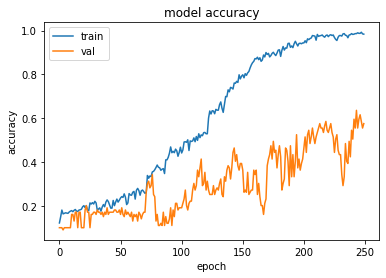

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
test_dir = "datasets/test/"
test_datagenerator = ImageDataGenerator(rescale=1./255)
test_generator = test_datagenerator.flow_from_directory(test_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)

Found 101 images belonging to 10 classes.


In [10]:
print("Evaluate on test data")
model.evaluate(test_generator, batch_size=128)

Evaluate on test data
1/1 [==============================] - 2s 2s/step - loss: 2.2539 - accuracy: 0.6733


[2.253910541534424, 0.6732673048973083]

In [15]:
class_labels = ['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [36]:
def predict(image_data, model):
  image = img_to_array(image_data)
  image = np.reshape(image,(1,288,432,4))
  prediction = model.predict(image/255)
  prediction = prediction.reshape((10,)) 
  class_label = np.argmax(prediction)

  print(class_label, prediction)
    
  fig,ax= plt.subplots(figsize=(6,4.5))
  ax.bar(x= class_labels, height= prediction)
  plt.xticks(rotation=45)
  ax.set_title("CNN Solution")
  
  plt.show()

4 [2.0783331e-04 6.1571312e-16 8.1948874e-06 4.0899437e-11 9.9690706e-01
 5.3353710e-22 2.8766422e-03 1.2720394e-11 2.0182070e-07 1.2515203e-08]


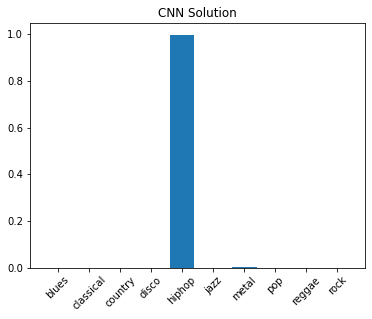

In [85]:
image_data = load_img('Data\images_original\hiphop\hiphop00068.png',color_mode='rgba',target_size=(288,432))
predict(image_data, model)

5 [2.2929208e-07 1.4778432e-06 2.9766973e-02 1.8945100e-02 8.2440552e-09
 9.3870902e-01 1.1313169e-03 2.0159787e-08 1.4606264e-05 1.1431237e-02]


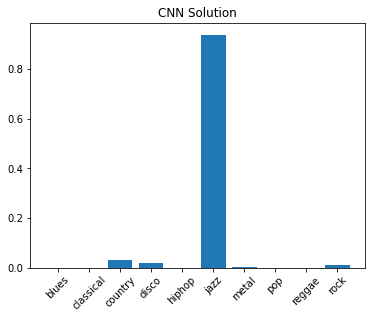

In [84]:
image_data2 = load_img('Data\images_original\jazz\jazz00055.png',color_mode='rgba',target_size=(288,432))
predict(image_data2, model)

6 [2.4105683e-08 7.9260277e-25 2.1671730e-07 3.2191980e-17 2.4675373e-03
 2.8200578e-34 9.9753213e-01 3.6262732e-22 6.5451672e-17 2.7806951e-10]


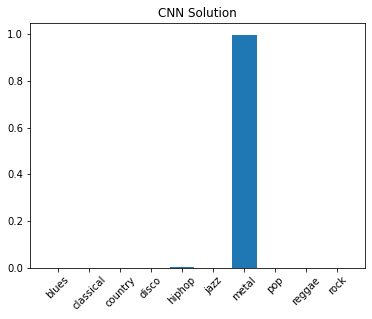

In [83]:
image_data3 = load_img('Data\images_original\metal\metal00096.png',color_mode='rgba',target_size=(288,432))
predict(image_data3, model)

3 [1.9970054e-03 1.0241794e-04 2.4234350e-03 6.8235928e-01 2.5409678e-01
 2.7664396e-06 4.2873332e-03 5.3184580e-02 5.5538246e-04 9.9110173e-04]


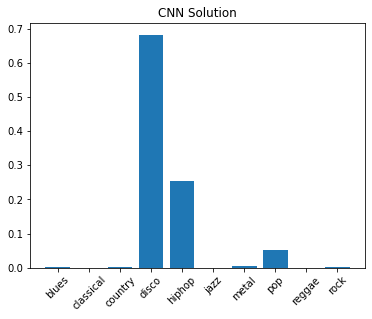

In [116]:
image_data4 = load_img('Data\images_original\disco\disco00093.png',color_mode='rgba',target_size=(288,432))
predict(image_data4, model)